In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yahooFinance
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [7]:
data = yahooFinance.Ticker('NVDA')
history = data.history(period='max')

In [8]:
data_dict = {'ds':[], 'y':[]}

dates = list(history.index)
for date in range(len(dates)):
    dates[date] = str(dates[date])
    dates[date] = dates[date][:10]

df = pd.DataFrame(data_dict)
df['ds'] = dates
df['y'] = list(history['Close'])
df

,ds,y
0,1999-01-22,0.037621
1,1999-01-25,0.041562
2,1999-01-26,0.038337
3,1999-01-27,0.038218
4,1999-01-28,0.038098
...,...,...
6429,2024-08-12,109.019997
6430,2024-08-13,116.139999
6431,2024-08-14,118.080002
6432,2024-08-15,122.860001


In [9]:
df = df.drop(df.head(len(df)-(365*3)).index).reset_index(drop=True)
df

,ds,y
0,2020-04-13,6.723143
1,2020-04-14,7.074436
2,2020-04-15,6.996952
3,2020-04-16,7.342265
4,2020-04-17,7.282968
...,...,...
1090,2024-08-12,109.019997
1091,2024-08-13,116.139999
1092,2024-08-14,118.080002
1093,2024-08-15,122.860001


In [11]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

16:25:12 - cmdstanpy - INFO - Chain [1] start processing
16:25:12 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
1455,2025-08-12,211.448846,182.144716,243.514276,209.945752,181.194932,242.526769
1456,2025-08-13,211.764615,181.364317,244.106947,210.192647,181.286580,242.914318
1457,2025-08-14,212.390827,182.326679,246.346580,210.439543,181.378229,243.301866
1458,2025-08-15,212.844940,183.064021,246.104509,210.686439,181.469900,243.684398
1459,2025-08-16,214.722509,184.926940,247.953261,210.933335,181.552513,244.060070


C:\Users\ojmou\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ojmou\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


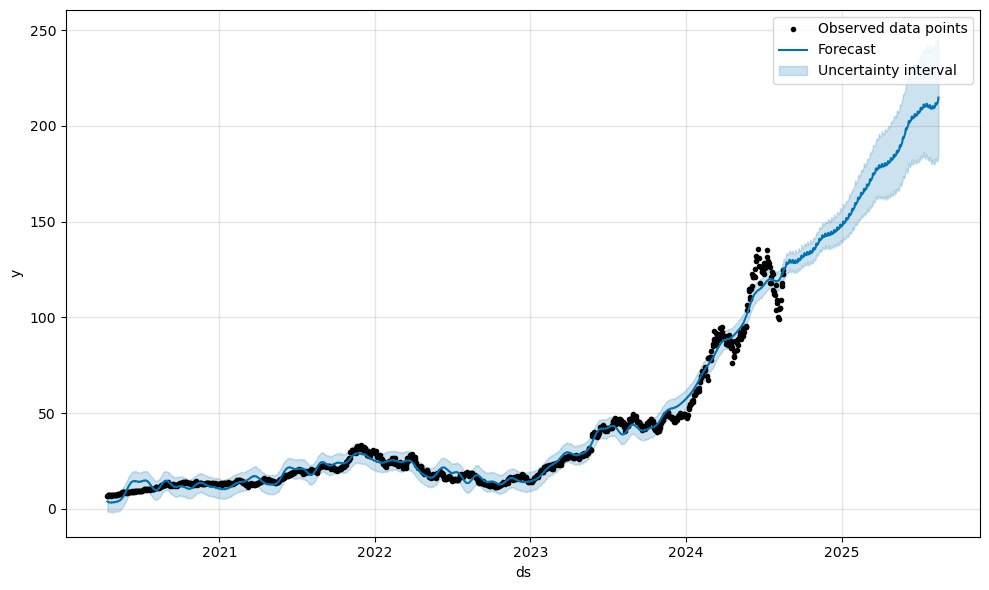

In [12]:
fig1 = m.plot(forecast, include_legend=True)

C:\Users\ojmou\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ojmou\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\ojmou\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

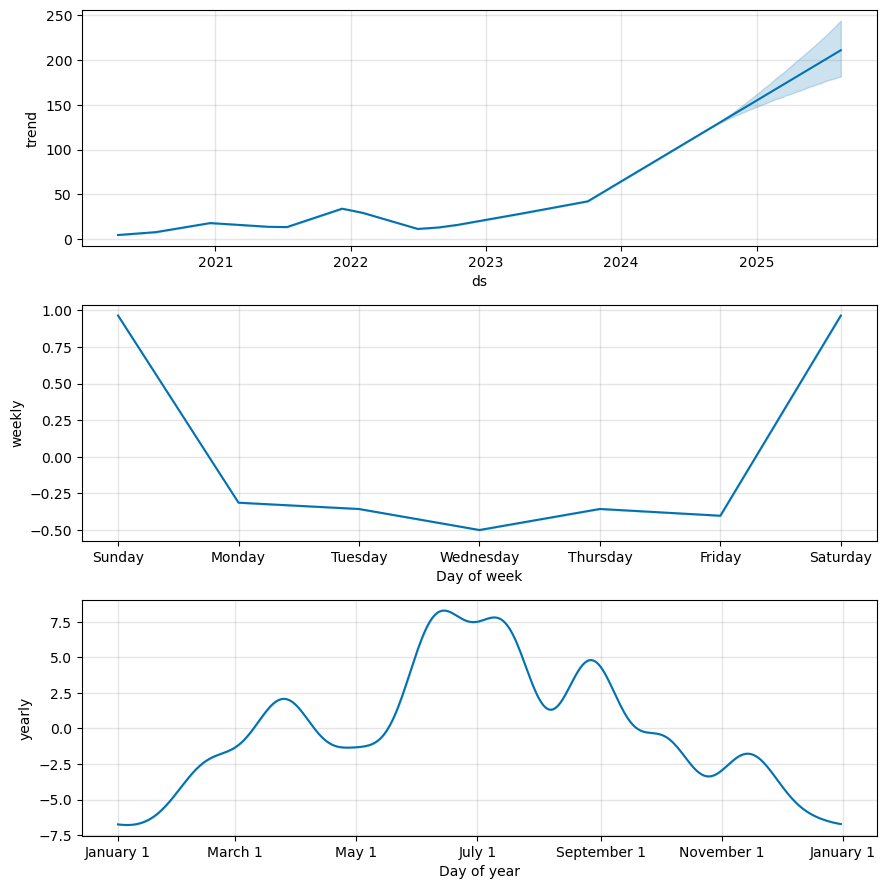

In [14]:
fig2 = m.plot_components(forecast)